
#### **Họ và tên:** Lê Phan Văn Việt
#### **MSSV:** 19146302
#### **Lớp:** AI sáng t4 
### **Nhận diện 10 loại trái cây CNN**

In [1]:
import pickle
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.layers import Dense, Activation, Flatten, Input, Dropout
from tensorflow.keras.optimizers import SGD
from keras.models import load_model
import cv2 as cv
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_data():
    file = open('/content/drive/MyDrive/dataCNN/fruit.data', 'rb')

    # dump information to that file
    (pixels, labels) = pickle.load(file)

    # close the file
    file.close()

    print(pixels.shape)
    print(labels.shape)


    return pixels, labels

In [3]:
label = ['Tao do','Chuoi','Cherry','Chanh','Xoai','Cam','Thom','Chom chom','Dau tay','Ca chua']

In [10]:
X,y = load_data()

(4800, 128, 128, 3)
(4800, 10)


In [11]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)

In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 128, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [14]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.1,
    rescale=1./255,
	width_shift_range=0.1,
    height_shift_range=0.1,
	horizontal_flip=True,
    brightness_range=[0.2,1.5], fill_mode="nearest")

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [15]:
history = model.fit(aug.flow(X_train, y_train, batch_size=128),epochs=30, validation_data=aug.flow(X_test,y_test,batch_size=128), verbose=1)

Epoch 1/30
30/30 [==============================] - 22s 725ms/step - loss: 1.8470 - accuracy: 0.3977 - val_loss: 0.9985 - val_accuracy: 0.6760
Epoch 2/30
30/30 [==============================] - 21s 699ms/step - loss: 0.8217 - accuracy: 0.7310 - val_loss: 0.6794 - val_accuracy: 0.7865
Epoch 3/30
30/30 [==============================] - 21s 703ms/step - loss: 0.5669 - accuracy: 0.8279 - val_loss: 0.2834 - val_accuracy: 0.9198
Epoch 4/30
30/30 [==============================] - 21s 701ms/step - loss: 0.3022 - accuracy: 0.9146 - val_loss: 0.2290 - val_accuracy: 0.9333
Epoch 5/30
30/30 [==============================] - 21s 706ms/step - loss: 0.1918 - accuracy: 0.9518 - val_loss: 0.1544 - val_accuracy: 0.9615
Epoch 6/30
30/30 [==============================] - 21s 711ms/step - loss: 0.1565 - accuracy: 0.9539 - val_loss: 0.1008 - val_accuracy: 0.9760
Epoch 7/30
30/30 [==============================] - 21s 701ms/step - loss: 0.1305 - accuracy: 0.9615 - val_loss: 0.0915 - val_accuracy: 0.9854

In [16]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: %.4f'% score[0])
print('Test accuracy %.4f'% score[1])

Test loss: 30.5622
Test accuracy 0.9698


In [17]:
model.save('Final.h5')

In [18]:
model_5 = load_model('Final.h5')

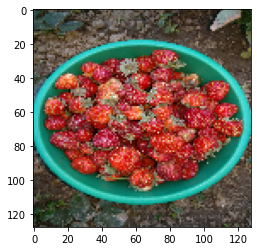

In [26]:
img = load_img('strawberries4.jpg', target_size=(128,128))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,128,128,3)
img = img.astype('float32')
img = img / 255.0

In [27]:
predict = model_5.predict(img)
label[np.argmax(model.predict(img), axis=1)[0]]

'Dau tay'